In [1]:
# Import he necessary Libraries
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('Copper_Set.csv')
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.shape

(181673, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# Type conversion 
# Numeric columns: quantity tons,customer,country,application,thickness,width,product,sp (to convert blank/any invalid values to null)
df["quantity tons"] = pd.to_numeric(df["quantity tons"],errors="coerce")
df["customer"] = pd.to_numeric(df["customer"],errors="coerce")
df["country"] = pd.to_numeric(df["country"],errors="coerce")
df["application"] = pd.to_numeric(df["application"],errors="coerce")
df["thickness"] = pd.to_numeric(df["thickness"],errors="coerce")
df["width"] = pd.to_numeric(df["width"],errors="coerce")
df["product_ref"] = pd.to_numeric(df["product_ref"],errors="coerce")
df["selling_price"] = pd.to_numeric(df["selling_price"],errors="coerce")

In [6]:
# Removing 0's in material reference column
df["material_ref"] = df["material_ref"].str.lstrip('0')

In [7]:
df.select_dtypes(include="object")

,id,status,item type,material_ref
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,Won,W,DEQ1 S460MC
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,Won,W,104991
2,E140FF1B-2407-4C02-A0DD-780A093B1158,Won,WI,S0380700
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,Won,S,DX51D+ZM310MAO 2.3X1317
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,Won,W,2_S275JR+AR-CL1
...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,Won,W,1000777
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,Won,W,1000227
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,Won,W,1004216
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,Won,W,1001149


In [8]:
# blank = (df["id"] == "").sum()
# blank = (df["status"] == "").sum()
# blank = (df["item type"] == "").sum()
blank = (df["material_ref"] == "").sum()
print(blank)

0


In [9]:
df["material_ref"].fillna("Not provided", inplace=True)

In [10]:
# date formatting
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date # taking only date and leaving time info
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date # taking only date and leaving time info

In [11]:
df.isna().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [15]:
df.shape


(181631, 14)

In [16]:
df_copy = df.copy()

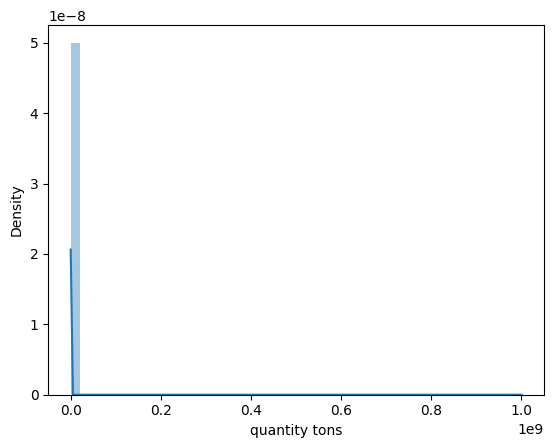

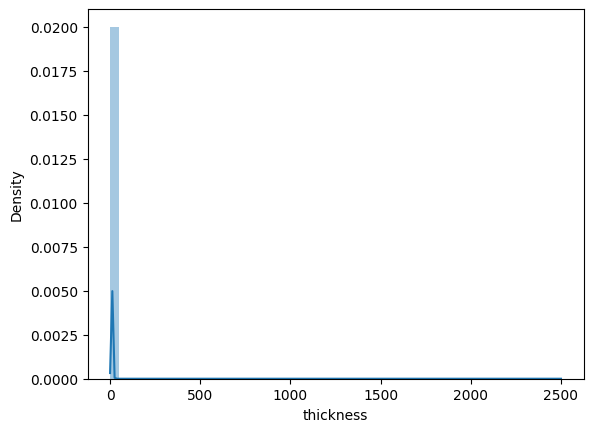

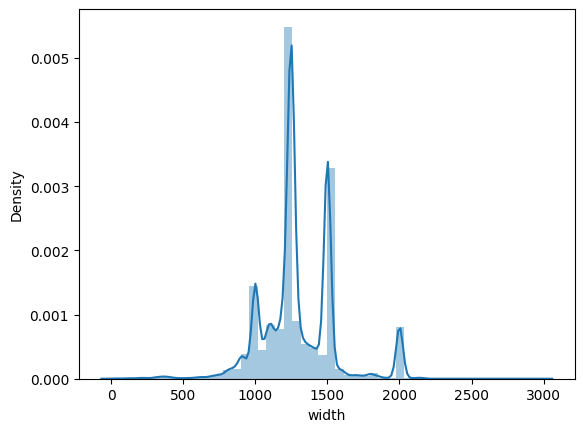

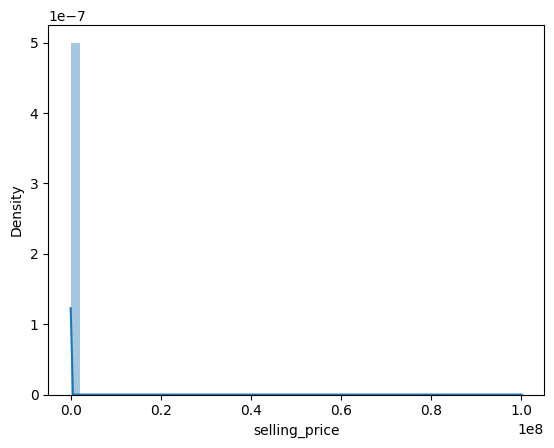

In [17]:
# Skewness 
sns.distplot(df["quantity tons"])
plt.show()
sns.distplot(df["thickness"])
plt.show()
sns.distplot(df["width"])
plt.show()
sns.distplot(df["selling_price"])
plt.show()


In [18]:
# we are doing log trnasformation to handle skewness, log transformation works effectively when the values are greater than zero
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x <= 0 else x)
df['thickness'] = df['thickness'].apply(lambda x: np.nan if x <= 0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x <= 0 else x)

In [19]:
df.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [20]:
df.dropna(inplace=True)
len(df)

181620

In [21]:
print(df["quantity tons"].skew())
print(df["thickness"].skew())
print(df["width"].skew())
print(df["selling_price"].skew())

424.62886378007687
15.302912009859163
0.3748118073364622
301.34412211966924


In [22]:
df.shape

(181620, 14)

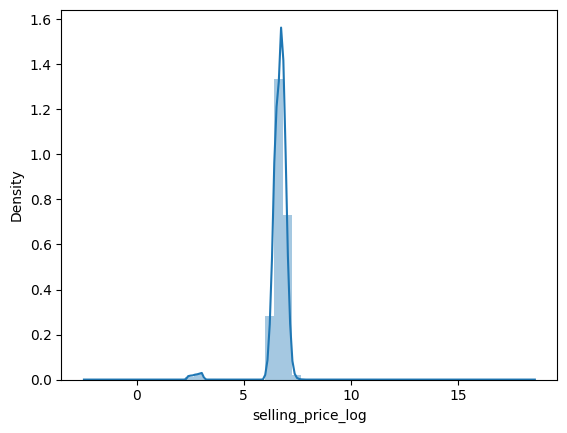

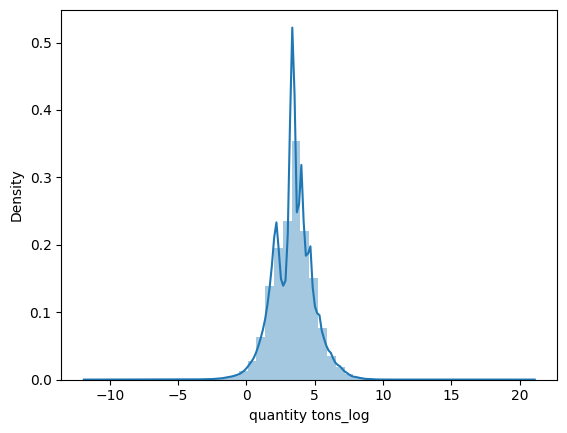

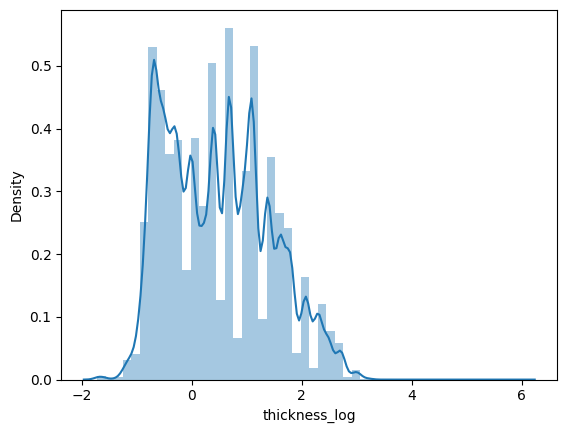

In [23]:
import numpy as np
df['selling_price_log'] = np.log(df['selling_price'])
sns.distplot(df['selling_price_log'])
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()

<Axes: >

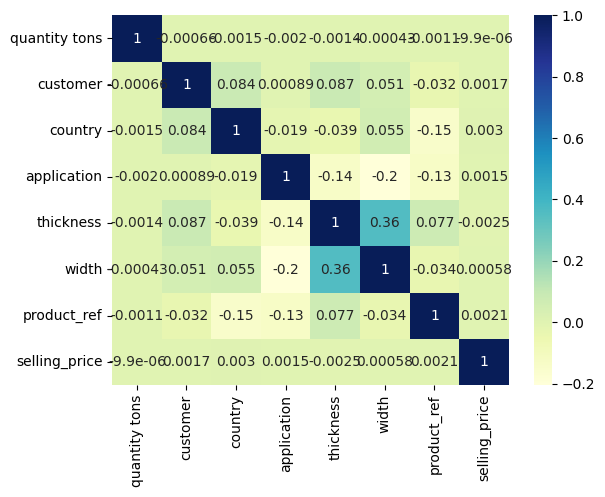

In [24]:
corr = df[['quantity tons', 'customer', 'country','application', 'thickness', 'width','product_ref', 'selling_price']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

# since there are no values greater than 0.7, no columns are highly correlated, no need to drop any columns.

In [25]:
df.shape

(181620, 17)

In [26]:
df["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [27]:
from sklearn.preprocessing import OneHotEncoder
# df.columns
X = df[['quantity tons_log', 'thickness_log','customer', 'country', 'status',
       'item type', 'application', 'width','product_ref']]
y = df[['selling_price_log']]
# df["status"].unique()
# df["item type"].unique()
ohe_item_type = OneHotEncoder(handle_unknown="ignore") #creating instance
ohe_item_type.fit(X[["item type"]]) #creting binary columns and forming matrix
X_item_type = ohe_item_type.fit_transform(X[["item type"]]).toarray() #converting sparse matrix to dense matrix array

ohe_status = OneHotEncoder(handle_unknown="ignore") #creating instance
ohe_status.fit(X[["status"]]) #creting binary columns and forming matrix
X_status = ohe_status.fit_transform(X[["status"]]).toarray() #converting sparse matrix to dense matrix array

X = np.concatenate((X[['quantity tons_log', 'thickness_log','customer', 'country', 'application', 'width','product_ref']].values,X_item_type,X_status),axis=1)



In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
print(X)

[[ 0.41506739  0.22814024 -0.75771563 ... -0.15323927  0.75215932
  -0.00234649]
 [ 2.25042993 -0.75339772 -0.29403459 ... -0.15323927  0.75215932
  -0.00234649]
 [ 1.77453529 -1.55084831 -0.78103392 ... -0.15323927  0.75215932
  -0.00234649]
 ...
 [ 1.34669579 -0.56931035 -0.31475754 ... -0.15323927  0.75215932
  -0.00234649]
 [-1.34846834 -0.88124292 -0.31475754 ... -0.15323927  0.75215932
  -0.00234649]
 [ 1.81043496 -0.88124292 -0.31475754 ... -0.15323927  0.75215932
  -0.00234649]]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
# Hyperparameters
param_grid = {
              "max_depth":[2,5,10,20],
              "min_samples_split":[2,5,10],
              "min_samples_leaf":[1,2,4],
              "max_features":["auto","sqrt","log2"]
             }

# grid search
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train,y_train)
# results = grid_search.cv_results_
# results_df = pd.DataFrame(results)
# print(results_df)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [32]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.03248690755630784
R-squared: 0.8987465410993717


In [34]:
new_sample = np.array([[np.log(10), 1, np.log(200), 1, 28,456789,1234567,'PL','Won']])
new_sample_item_type = ohe_item_type.transform(new_sample[:, [7]]).toarray()
new_sample_status = ohe_status.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, 0:7], new_sample_item_type, new_sample_status), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred)) # inverse of log, to get back its original form

Predicted selling price: [846.]


In [35]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('itemtype.pkl', 'wb') as file:
    pickle.dump(ohe_item_type, file)
with open('status.pkl', 'wb') as file:
    pickle.dump(ohe_status, file)

In [36]:
# ML Classification model

In [37]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.953684,6.643822,-0.223144


In [38]:
df["status"].value_counts()

status
Won                115996
Lost                34431
Not lost for AM     19566
Revised              4276
To be approved       4167
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [39]:
df_status = df[(df["status"]=="Won") | (df["status"]=="Lost")]
len(df_status)

150427

In [40]:
df_status.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.953684,6.643822,-0.223144


In [41]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [42]:
X = df_status[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer', 'product_ref']]
Y = df_status["status"]

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

X = df_status[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer', 'product_ref']]
Y = df_status["status"]

ohe_item_type = OneHotEncoder(handle_unknown="ignore")
ohe_item_type.fit(X[["item type"]])
X_item_type = ohe_item_type.fit_transform(X[["item type"]]).toarray()

# encoding target variables
LB = LabelBinarizer()
LB.fit(Y)
y = LB.fit_transform(Y)

X = np.concatenate((X[['quantity tons_log','selling_price_log','application','thickness_log','width','country','customer', 'product_ref']].values, X_item_type),axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10] }

grid_search = GridSearchCV(estimator=dtc,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n{cm}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy:0.9146446852356578
Confusion Matrix:
[[ 5705  1297]
 [ 1271 21813]]


In [44]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print(f"Classification Report: \n{cr}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



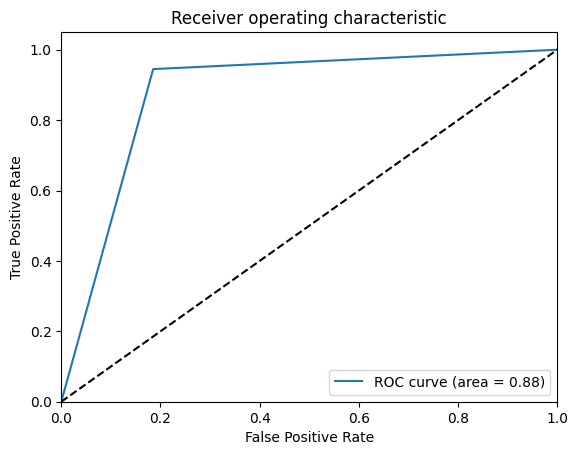

In [45]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
# Predict the status for a new sample
new_sample = np.array([[np.log(200), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_item_type = ohe_item_type.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:,0:8], new_sample_item_type), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample)
if new_pred == 1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [47]:
# Saving the model
import pickle
with open('clsmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('cscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('citemtype.pkl', 'wb') as file:
    pickle.dump(ohe_item_type, file)